In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [27]:
import sys
sys.path.append("../") 

from utils.paths import make_dir_line

modality = 'c'
project = 'Joining Data in SQL'
data = make_dir_line(modality, project)

raw = data('raw')

In [28]:
import sqlite3

conn = sqlite3.connect(":memory:")  ## aca se indica el nombre de la db.
cur = conn.cursor()

# 5.2.0 Outer Joins, Cross Joins and Self Joins

In [29]:
conn.executescript(
    """
    
DROP TABLE IF EXISTS cities;

CREATE TABLE cities (
    name                  STRING,
    country_code          STRING,
    city_proper_pop       DOUBLE,
    metroarea_pop         DOUBLE,
    urbanarea_pop         DOUBLE
);


DROP TABLE IF EXISTS countries;

CREATE TABLE countries (
  code                  STRING     PRIMARY KEY,
  name                  VARCHAR,
  continent             VARCHAR,
  region                VARCHAR,
  surface_area          REAL,
  indep_year            INTEGER,
  local_name            VARCHAR,
  gov_form              VARCHAR,
  capital               VARCHAR,
  cap_long              REAL,
  cap_lat               REAL
);


DROP TABLE IF EXISTS economies;

CREATE TABLE economies (
  econ_id               INTEGER     PRIMARY KEY,
  code                  STRING,
  year                  INTEGER,
  income_group          VARCHAR,
  gdp_percapita         REAL,
  gross_savings         REAL,
  inflation_rate        REAL,
  total_investment      REAL,
  unemployment_rate     REAL,
  exports               REAL,
  imports               REAL
);


DROP TABLE IF EXISTS languages;

CREATE TABLE languages (
  lang_id               INTEGER     PRIMARY KEY,
  code                  VARCHAR,
  name                  VARCHAR,
  percent               REAL,
  official              BOOLEAN
);


DROP TABLE IF EXISTS populations;

CREATE TABLE populations (
  pop_id                DOUBLE     PRIMARY KEY,
  country_code          VARCHAR,
  year                  DOUBLE,
  fertility_rate        REAL,
  life_expectancy       REAL,
  size                  REAL
);


DROP TABLE IF EXISTS currencies;

CREATE TABLE currencies (
  curr_id               INTEGER     PRIMARY KEY,
  code                  VARCHAR,
  basic_unit            VARCHAR,
  curr_code             VARCHAR,
  frac_unit             VARCHAR,
  frac_perbasic         REAL
);





"""
)
conn.commit()

In [30]:
df = pd.read_csv(raw / 'countries/cities.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
cities = list(zip(df.name, df.country_code, df.city_proper_pop, df.metroarea_pop, df.urbanarea_pop))
cur.executemany("INSERT INTO cities VALUES  (?,?,?,?,?)", cities)

In [31]:
df = pd.read_csv(raw / 'countries/countries.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
countries = list(zip(df.code, df.country_name, df.continent, df.region, df.surface_area, df.indep_year, df.local_name, df.gov_form, df.capital, df.cap_long, df.cap_lat))
cur.executemany("INSERT INTO countries VALUES  (?,?,?,?,?,?,?,?,?,?,?)", countries)

In [32]:
df = pd.read_csv(raw / 'countries/economies.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
economies = list(zip(df.econ_id, df.code, df.year, df.income_group, df.gdp_percapita, df.gross_savings, df.inflation_rate, df.total_investment, df.unemployment_rate, df.exports, df.imports))
cur.executemany("INSERT INTO economies VALUES  (?,?,?,?,?,?,?,?,?,?,?)", economies)

In [33]:
df = pd.read_csv(raw / 'countries/languages.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
languages = list(zip(df.lang_id, df.code, df.name, df.percent, df.official))
cur.executemany("INSERT INTO languages VALUES  (?,?,?,?,?)", languages)

In [34]:
df = pd.read_csv(raw / 'countries/populations.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
populations = list(zip(df.pop_id, df.country_code, df.year, df.fertility_rate, df.life_expectancy, str(df.size)))
cur.executemany("INSERT INTO populations VALUES  (?,?,?,?,?,?)", populations)

In [35]:
df = pd.read_csv(raw / 'countries/currencies.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
currencies = list(zip(df.curr_id, df.code, df.basic_unit, df.curr_code, df.frac_unit, df.frac_perbasic))
cur.executemany("INSERT INTO currencies VALUES  (?,?,?,?,?,?)", currencies)

## 5.3.2 Remembering what is LEFT

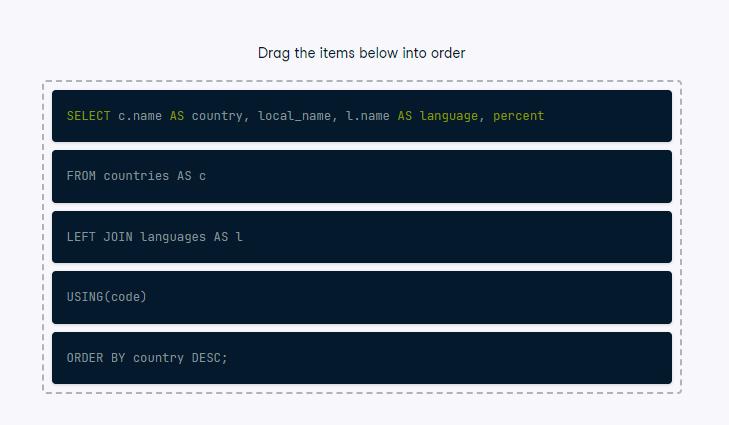

## 5.3.3 This is a LEFT JOIN, right?

In [ ]:
# Perform an inner join with cities as c1 and countries as c2 on country code
cur.execute("""
            
            SELECT c1.name AS city, code, c2.name AS country, region, city_proper_pop 
            FROM cities AS c1 
            INNER JOIN countries AS c2 ON c1.country_code = c2.code 
            ORDER BY code DESC;
            
            """).fetchall()

In [15]:
# -- Join right table (with alias)
cur.execute("""
            
            SELECT c1.name AS city, code, c2.name AS country, region, city_proper_pop 
            FROM cities AS c1 
            LEFT JOIN countries AS c2 ON c1.country_code = c2.code 
            ORDER BY code DESC;
            
            """).fetchall()

[('Harare', 'ZWE', 'Zimbabwe', 'Eastern Africa', 1606000.0),
 ('Lusaka', 'ZMB', 'Zambia', 'Eastern Africa', 1742979.0),
 ('Cape Town', 'ZAF', 'South Africa', 'Southern Africa', 3740026.0),
 ('Durban', 'ZAF', 'South Africa', 'Southern Africa', 3442361.0),
 ('Ekurhuleni', 'ZAF', 'South Africa', 'Southern Africa', 3178470.0),
 ('Johannesburg', 'ZAF', 'South Africa', 'Southern Africa', 4434827.0),
 ("Sana'a", 'YEM', 'Yemen', 'Middle East', 1937451.0),
 ('Hanoi', 'VNM', 'Vietnam', 'Southeast Asia', 6844100.0),
 ('Ho Chi Minh City', 'VNM', 'Vietnam', 'Southeast Asia', 7681700.0),
 ('Caracas', 'VEN', 'Venezuela', 'South America', 1943901.0),
 ('Maracaibo', 'VEN', 'Venezuela', 'South America', 1599940.0),
 ('Tashkent', 'UZB', 'Uzbekistan', 'Southern and Central Asia', 2309600.0),
 ('Chicago', 'USA', 'United States', 'North America', 2695598.0),
 ('Dallas', 'USA', 'United States', 'North America', 1317929.0),
 ('Houston', 'USA', 'United States', 'North America', 2489558.0),
 ('Los Angeles', 'US

## 5.3.4 Building on your LEFT JOIN

In [16]:
# -- Match on code fields, Filter for the year 2010
cur.execute("""
            
            SELECT name, region, gdp_percapita
            FROM countries AS c
            LEFT JOIN economies AS e
            ON c.code = e.code
            WHERE year = 2010;
            
            """).fetchall()

[('Afghanistan', 'Southern and Central Asia', 539.667),
 ('Angola', 'Central Africa', 3599.27),
 ('Albania', 'Southern Europe', 4098.13),
 ('United Arab Emirates', 'Middle East', 34628.63),
 ('Argentina', 'South America', 10412.95),
 ('Armenia', 'Middle East', 3121.78),
 ('Antigua and Barbuda', 'Caribbean', 13531.78),
 ('Australia', 'Australia and New Zealand', 56362.84),
 ('Austria', 'Western Europe', 46757.13),
 ('Azerbaijan', 'Middle East', 5847.26),
 ('Burundi', 'Eastern Africa', 242.84),
 ('Belgium', 'Western Europe', 44691.32),
 ('Benin', 'Western Africa', 734.278),
 ('Burkina Faso', 'Western Africa', 588.584),
 ('Bangladesh', 'Southern and Central Asia', 807.531),
 ('Bulgaria', 'Eastern Europe', 6743.74),
 ('Bahrain', 'Middle East', 20823.22),
 ('Bahamas', 'Caribbean', 22957.79),
 ('Bosnia and Herzegovina', 'Southern Europe', 4404.37),
 ('Belarus', 'Eastern Europe', 6023.15),
 ('Belize', 'Central America', 4321.29),
 ('Bolivia', 'South America', 1994.91),
 ('Brazil', 'South Amer

In [17]:
# -- Select region, and average gdp_percapita as avg_gdp, Group by region
cur.execute("""
            
            SELECT region, AVG(gdp_percapita) AS avg_gdp
            FROM countries AS c
            LEFT JOIN economies AS e
            USING(code)
            WHERE year = 2010
            GROUP BY region;
            
            """).fetchall()


[('Australia and New Zealand', 44792.384999999995),
 ('Baltic Countries', 12631.029999999999),
 ('British Islands', 43588.33),
 ('Caribbean', 11413.339461538462),
 ('Central Africa', 4797.239888888889),
 ('Central America', 4969.969999999999),
 ('Eastern Africa', 1757.3481875),
 ('Eastern Asia', 24962.807999999997),
 ('Eastern Europe', 10095.456666666667),
 ('Melanesia', 2532.6099999999997),
 ('Micronesia', 4497.652),
 ('Middle East', 18204.64176470588),
 ('Nordic Countries', 57073.998),
 ('North America', 47911.509999999995),
 ('Northern Africa', 4713.861666666667),
 ('Polynesia', 3451.3633333333332),
 ('South America', 7420.599166666667),
 ('Southeast Asia', 10547.154400000001),
 ('Southern Africa', 5051.598),
 ('Southern Europe', 22926.410909090908),
 ('Southern and Central Asia', 2797.1549999999997),
 ('Western Africa', 998.9548750000001),
 ('Western Europe', 58130.962857142855)]

In [18]:
# -- Order by descending avg_gdp, Return only first 10 records
cur.execute("""
            
            SELECT region, AVG(gdp_percapita) AS avg_gdp
            FROM countries AS c
            LEFT JOIN economies AS e
            USING(code)
            WHERE year = 2010
            GROUP BY region
            ORDER BY avg_gdp DESC
            LIMIT 10;
            
            """).fetchall()

[('Western Europe', 58130.962857142855),
 ('Nordic Countries', 57073.998),
 ('North America', 47911.509999999995),
 ('Australia and New Zealand', 44792.384999999995),
 ('British Islands', 43588.33),
 ('Eastern Asia', 24962.807999999997),
 ('Southern Europe', 22926.410909090908),
 ('Middle East', 18204.64176470588),
 ('Baltic Countries', 12631.029999999999),
 ('Caribbean', 11413.339461538462)]

## 5.3.5 Is this RIGHT?

Note: RIGHT and FULL OUTER JOINs are not currently supported in SQLITE3

In [20]:
# -- Modify this query to use RIGHT JOIN instead of LEFT JOIN
# cur.execute("""
            
#             SELECT countries.name AS country, languages.name AS language, percent
#             FROM languages
#             RIGHT JOIN countries
#             USING(code)
#             ORDER BY language;
            
#             """).fetchall()

## 5.3.6 Comparing joins

In [22]:
# # -- Join to currencies, Where region is North America or name is null
# cur.execute("""
            
#             SELECT name AS country, code, region, basic_unit
#             FROM countries
#             FULL JOIN currencies
#             USING (code)
#             WHERE region = 'North America' OR region IS NULL
#             ORDER BY region;
            
#             """).fetchall()

In [36]:
# -- replace FULL JOIN for LEFT JOIN
cur.execute("""
            
            SELECT name AS country, code, region, basic_unit
            FROM countries
            LEFT JOIN currencies
            USING (code)
            WHERE region = 'North America' 
                OR name IS NULL
            ORDER BY region;
            
            """).fetchall()

[('Bermuda', 'BMU', 'North America', 'Bermudian dollar'),
 ('Greenland', 'GRL', 'North America', None),
 ('Canada', 'CAN', 'North America', 'Canadian dollar'),
 ('United States', 'USA', 'North America', 'United States dollar')]

In [37]:
# -- replace FULL JOIN for INNER JOIN
cur.execute("""
            
            SELECT name AS country, code, region, basic_unit
            FROM countries
            INNER JOIN currencies
            USING (code)
            WHERE region = 'North America' 
                OR name IS NULL
            ORDER BY region;
            
            """).fetchall()

[('Bermuda', 'BMU', 'North America', 'Bermudian dollar'),
 ('Canada', 'CAN', 'North America', 'Canadian dollar'),
 ('United States', 'USA', 'North America', 'United States dollar')]

In [14]:
cur.execute("""
            
            SELECT name 
            FROM cities;
            
            """).fetchall()

[('Abidjan',),
 ('Abu Dhabi',),
 ('Abuja',),
 ('Accra',),
 ('Addis Ababa',),
 ('Ahmedabad',),
 ('Alexandria',),
 ('Algiers',),
 ('Almaty',),
 ('Ankara',),
 ('Auckland',),
 ('Baghdad',),
 ('Baku',),
 ('Bandung',),
 ('Bangkok',),
 ('Barcelona',),
 ('Barranquilla',),
 ('Basra',),
 ('Beijing',),
 ('Belo Horizonte',),
 ('Bengaluru',),
 ('Berlin',),
 ('Bhopal',),
 ('Birmingham',),
 ('Bogota',),
 ('Brasilia',),
 ('Brazzaville',),
 ('Brisbane',),
 ('Bucharest',),
 ('Budapest',),
 ('Buenos Aires',),
 ('Busan',),
 ('Cairo',),
 ('Calgary',),
 ('Cali',),
 ('Caloocan',),
 ('Campinas',),
 ('Cape Town',),
 ('Caracas',),
 ('Casablanca',),
 ('Changchun',),
 ('Changsha',),
 ('Chaozhou',),
 ('Chengdu',),
 ('Chennai',),
 ('Chicago',),
 ('Chittagong',),
 ('Chongqing',),
 ('Cologne',),
 ('Cordoba',),
 ('Curitiba',),
 ('Daegu',),
 ('Daejeon',),
 ('Dakar',),
 ('Dalian',),
 ('Dallas',),
 ('Dar es Salaam',),
 ('Davao City',),
 ('Delhi',),
 ('Dhaka',),
 ('Dongguan',),
 ('Douala',),
 ('Dubai',),
 ('Durban',),
 ('

In [51]:
print('Ok_')

Ok_
